In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# MODEL 1
## 3  Convolutional Layer

In [0]:
model = Sequential()
#Layer 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding='same'))
model.add(Dropout(0.25))

#Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

#Layer 3
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [0]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 395s 7ms/step - loss: 0.2773 - acc: 0.9143 - val_loss: 0.0518 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 392s 7ms/step - loss: 0.0846 - acc: 0.9752 - val_loss: 0.0354 - val_acc: 0.9878
Epoch 3/12
60000/60000 [==============================] - 392s 7ms/step - loss: 0.0622 - acc: 0.9814 - val_loss: 0.0307 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 389s 6ms/step - loss: 0.0508 - acc: 0.9849 - val_loss: 0.0274 - val_acc: 0.9905
Epoch 5/12
60000/60000 [==============================] - 384s 6ms/step - loss: 0.0442 - acc: 0.9869 - val_loss: 0.0238 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 378s 6ms/step - loss: 0.0387 - acc: 0.9883 - val_loss: 0.0241 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 377s 6ms/step - loss: 0.0346 - acc: 0.9899 - val_loss: 0.0215 - 

Test score: 0.02229008813643868
Test accuracy: 0.9931


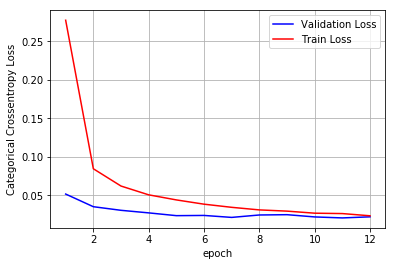

In [0]:
from IPython.display import Image
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

from keras.callbacks import History
vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
# Image('my_figure.png')

# MODEL 2
## 5 Convolutional Layer

In [0]:
model = Sequential()
#Layer 1
model.add(Conv2D(32, kernel_size=(5,5),activation='relu',input_shape=input_shape,padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

#Layer 2
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.8))

#Layer 3
model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

#Layer 4
model.add(Conv2D(128, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Layer 5
model.add(Conv2D(256, (5, 5), activation='relu',padding='same'))
model.add(Dropout(0.8))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 14, 10, 32)        832       
_________________________________________________________________
dropout_88 (Dropout)         (None, 14, 10, 32)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 14, 10, 32)        128       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 14, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 5, 64)          0         
_________________________________________________________________
dropout_89 (Dropout)         (None, 7, 5, 64)          0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 7, 5, 64)          102464    
__________

In [0]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 423s 7ms/step - loss: 1.4997 - acc: 0.4791 - val_loss: 0.4765 - val_acc: 0.8408
Epoch 2/12
60000/60000 [==============================] - 420s 7ms/step - loss: 0.5599 - acc: 0.8273 - val_loss: 0.2262 - val_acc: 0.9408
Epoch 3/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.4078 - acc: 0.8791 - val_loss: 0.1981 - val_acc: 0.9506
Epoch 4/12
60000/60000 [==============================] - 415s 7ms/step - loss: 0.3378 - acc: 0.9019 - val_loss: 0.1611 - val_acc: 0.9624
Epoch 5/12
60000/60000 [==============================] - 420s 7ms/step - loss: 0.2886 - acc: 0.9160 - val_loss: 0.1266 - val_acc: 0.9683
Epoch 6/12
60000/60000 [==============================] - 420s 7ms/step - loss: 0.2628 - acc: 0.9237 - val_loss: 0.1236 - val_acc: 0.9725
Epoch 7/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.2398 - acc: 0.9308 - val_loss: 0.1258 - 

Test score: 0.09692391774356365
Test accuracy: 0.9825


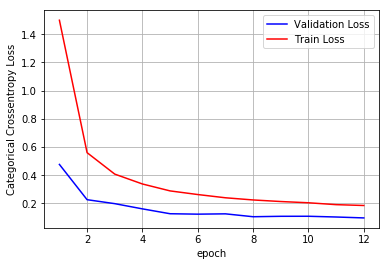

In [0]:
from IPython.display import Image
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

from keras.callbacks import History
vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
# Image('my_figure.png')

# MODEL 3
## 7 Convolutional Layer

In [0]:
model = Sequential()
#Layer 1
model.add(Conv2D(32, kernel_size=(7,7),activation='relu',input_shape=input_shape,strides=(4,4),padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,1)))

#Layer 2
model.add(Conv2D(64, (7, 7), activation='relu',strides=(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.45))
model.add(MaxPooling2D(pool_size=(1,1)))


#Layer 3
model.add(Conv2D(96, (5, 5), activation='relu',strides=(3,3),padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,1)))

#Layer 4
model.add(Conv2D(100, (7, 7), activation='relu',strides=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Layer 5
model.add(Conv2D(150, (5, 5), activation='relu',strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

#Layer 6
model.add(Conv2D(200, (5, 5), activation='relu',strides=(2,2),padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1,1)))


#Layer 7
model.add(Conv2D(250, (7, 7), activation='relu',strides=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 7, 7, 32)          1600      
_________________________________________________________________
dropout_69 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_68 (Batc (None, 7, 7, 32)          128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 2, 2, 64)          100416    
_________________________________________________________________
batch_normalization_69 (Batc (None, 2, 2, 64)          256       
_________________________________________________________________
dropout_70 (Dropout)         (None, 2, 2, 64)          0         
__________

In [0]:


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 33s 542us/step - loss: 1.0206 - acc: 0.6629 - val_loss: 0.2075 - val_acc: 0.9514
Epoch 2/12
60000/60000 [==============================] - 27s 454us/step - loss: 0.3411 - acc: 0.9096 - val_loss: 0.1315 - val_acc: 0.9687
Epoch 3/12
60000/60000 [==============================] - 27s 454us/step - loss: 0.2534 - acc: 0.9368 - val_loss: 0.1073 - val_acc: 0.9736
Epoch 4/12
60000/60000 [==============================] - 27s 454us/step - loss: 0.2185 - acc: 0.9462 - val_loss: 0.0824 - val_acc: 0.9807
Epoch 5/12
60000/60000 [==============================] - 27s 453us/step - loss: 0.1957 - acc: 0.9534 - val_loss: 0.0732 - val_acc: 0.9812
Epoch 6/12
60000/60000 [==============================] - 27s 453us/step - loss: 0.1750 - acc: 0.9580 - val_loss: 0.0611 - val_acc: 0.9853
Epoch 7/12
60000/60000 [==============================] - 27s 456us/step - loss: 0.1650 - acc: 0.9602 - val_loss: 0.

Test score: 0.060311755873821676
Test accuracy: 0.9848


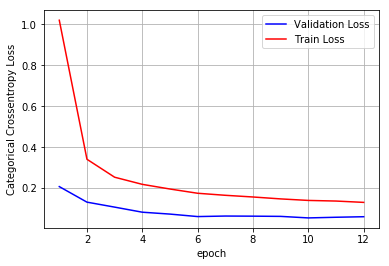

In [0]:
from IPython.display import Image
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

from keras.callbacks import History
vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
# Image('my_figure.png')

# MODEL4 
##  WITHOUT DROPOUT AND BATCH NORMALIZATION

In [0]:
model = Sequential()
#Layer 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding='same'))

#Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))

#Layer 3
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

W0706 02:28:50.833689 139745330485120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 02:28:50.845573 139745330485120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0706 02:28:50.993866 139745330485120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.2368 - acc: 0.9275 - val_loss: 0.0499 - val_acc: 0.9832
Epoch 2/12
60000/60000 [==============================] - 13s 224us/step - loss: 0.0737 - acc: 0.9771 - val_loss: 0.0347 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.0542 - acc: 0.9841 - val_loss: 0.0359 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.0427 - acc: 0.9875 - val_loss: 0.0252 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0221 - val_acc: 0.9924
Epoch 6/12
60000/60000 [==============================] - 13s 221us/step - loss: 0.0283 - acc: 0.9910 - val_loss: 0.0250 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 13s 222us/step - loss: 0.0268 - acc: 0.9915 - val_loss: 0.

Test score: 0.02573039901818379
Test accuracy: 0.9933


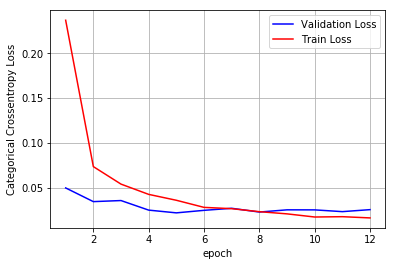

In [9]:
from IPython.display import Image
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

from keras.callbacks import History
vy = history.history['val_loss']
ty = history.history['loss']
ax.plot(x, vy, 'b', label="Validation Loss")
ax.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.grid()

fig.savefig('my_figure.png')
# Image('my_figure.png')

# CONCLUSION

In [0]:
from prettytable import PrettyTable
table=PrettyTable(['MODEL','NO. OF HIDDEN LAYERS','ARCHITECTURE','Categorical Crossentropy Loss','ACCURACY'])

table.add_row(['MODEL 1','3','IP->CN->DP->CN->CN->PL->DP->FL->DN->DP->DN','0.02223','0.9931'])
table.add_row(['MODEL 2','5','IP->CN->DP->BN->CN->PL->DP->CN->PL->BN->DP->CN->DP->BN->PL->FL->DN->DP->DN->OP','0.0969','0.9825'])
table.add_row(['MODEL 3','7','IP->CN->DP->BN->PL->CN->BN->DP->PL->CN->DP->BN->PL->CN->BN->DP->CN->BN->DP->PL->CN->DP->BN->PL->CN->BN->DP->PL->FL->DN->DN->OP','0.0603','0.9848'])
table.add_row(['MODEL 4','3','IP->CN->CN->CN->PL->FL->DN->DN','0.0257','0.9933'])






In [11]:
print('ABBREVATIONS \n1.BN-> BATCH NORMALISATION\n2.DP-> DROPOUTS\n3.IP-> INPUT LAYER\n4.OP-> OUTPUT LAYER\n5.FL-> FLATTEN LAYER \n6.CN-> CONVOLUTIONAL LAYER\n7.PL-> MAX POOLING  \n8.DN-> DENSE LAYER\n\n TABLE')

print(table)

ABBREVATIONS 
1.BN-> BATCH NORMALISATION
2.DP-> DROPOUTS
3.IP-> INPUT LAYER
4.OP-> OUTPUT LAYER
5.FL-> FLATTEN LAYER 
6.CN-> CONVOLUTIONAL LAYER
7.PL-> MAX POOLING  
8.DN-> DENSE LAYER

 TABLE
+---------+----------------------+--------------------------------------------------------------------------------------------------------------------------------+-------------------------------+----------+
|  MODEL  | NO. OF HIDDEN LAYERS |                                                          ARCHITECTURE                                                          | Categorical Crossentropy Loss | ACCURACY |
+---------+----------------------+--------------------------------------------------------------------------------------------------------------------------------+-------------------------------+----------+
| MODEL 1 |          3           |                                           IP->CN->DP->CN->CN->PL->DP->FL->DN->DP->DN                                           |            0.02223    